In [14]:
#
# ローソク足チャートを描く
#
%matplotlib inline
import datetime
import pymongo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.finance as mf
from matplotlib.dates import date2num

In [8]:
client = pymongo.MongoClient('mongodb://ec2-54-250-245-71.ap-northeast-1.compute.amazonaws.com:27017/bitflyer')
db = client.bitflyer
#co = db.lightning_executions_FX_BTC_JPY_OHLC_300
#co = db.lightning_executions_FX_BTC_JPY_OHLC_3600
co = db.lightning_executions_FX_BTC_JPY_OHLC_86400

In [9]:
date=[]
quote = []
volume_sell = []
volume_buy = []
volume_diff = []

#open_dateがafter以降のデータ
#after = datetime.datetime(2017,6,11)
#for data in co.find({'open_date':{'$gte':after}}).sort('id',1):

#直近のデータ100件
count = 100
for data in co.find({}).skip(co.count() - count).sort('id',1):
    t = data['op_date']
    date.append(t)
    quote.append((date2num(t), data['op'], data['cl'], data['hi'], data['lo']))
    volume_sell.append(data['vol_sell'])
    volume_buy.append(data['vol_buy'])
    volume_diff.append(data['vol_buy']-data['vol_sell'])

In [10]:
# figure_width := ローソク足チャート全体の幅 (単位:日)
# candle_width := ローソクの幅 (単位:日)
delta = date[-1] - date[0]
figure_width = delta.total_seconds()/(60*60*24)
candle_width = 0.6 * figure_width / count;

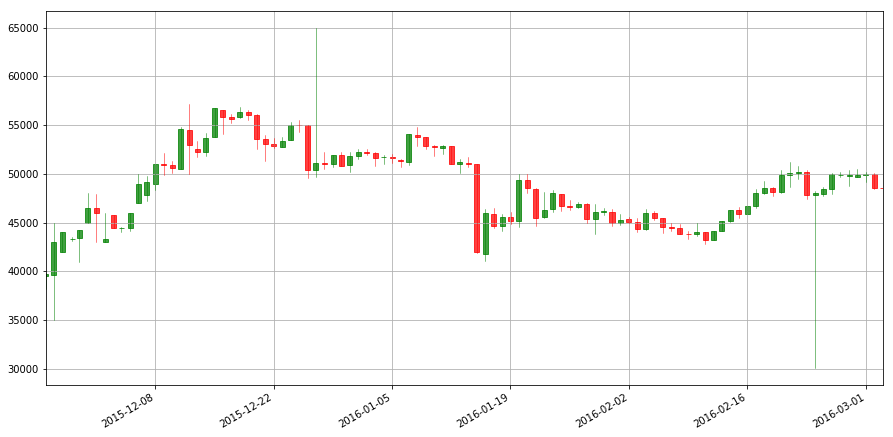

100

In [11]:
# ローソク足チャートを描く
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.grid()
ax.set_xlim(date[0], date[-1])
mf.candlestick_ochl(ax, quote, width=candle_width, colorup='g', colordown='r', alpha=0.75)
fig.autofmt_xdate()
plt.show()
len(date)

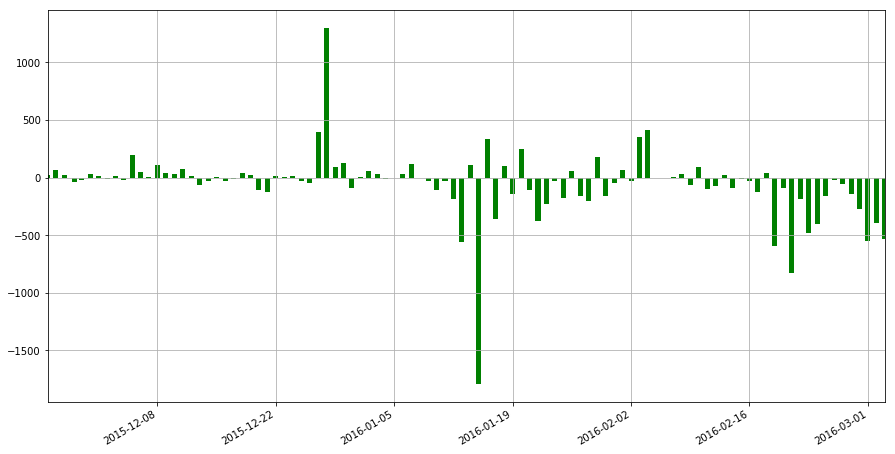

In [12]:
# 出来高（買い）と出来高（売り）の差の棒グラフを描く
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.grid()
ax.set_xlim(date[0], date[-1])
ax.bar(date, volume_diff, width=candle_width, color='g')
fig.autofmt_xdate()

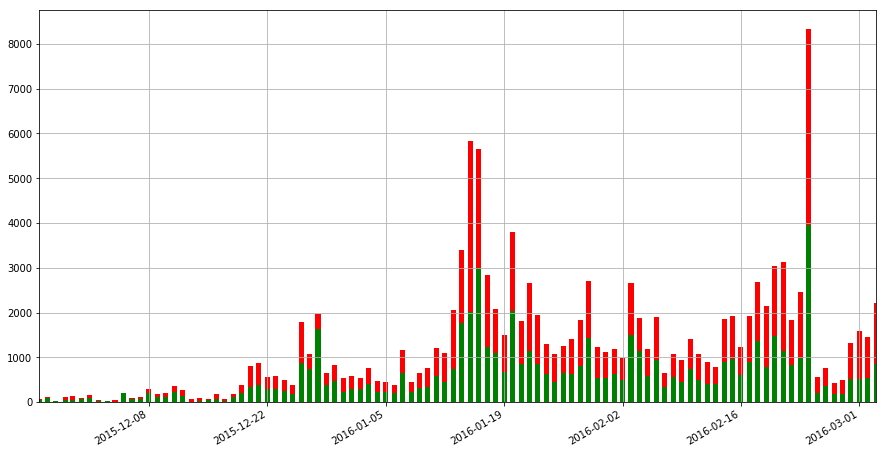

In [13]:
# 出来高の棒グラフを描く（赤＝売り、緑＝買い）
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.grid()
ax.set_xlim(date[0], date[-1])
ax.bar(date, volume_buy, width=candle_width, color='g')
ax.bar(date, volume_sell, bottom=volume_buy, width=candle_width, color='r')
fig.autofmt_xdate()